In [18]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

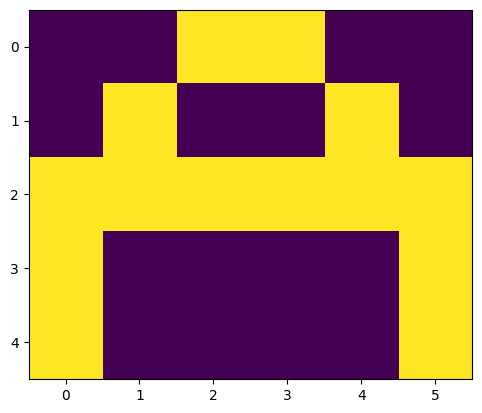

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [20]:
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [25]:
# activation function

def sigmoid(x):
    return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# out put of layer 2

    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return(a2)

# initializing the weights randomly
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))

# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):

    # hidden layer
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# output of layer 2

    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
                                   (np.multiply(a1, 1-a1)))

    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))

    return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)

def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()

In [26]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-0.5785071  -0.19192817  0.24778008 -0.75424445 -0.58824609]
 [ 0.21336858  1.0721223   1.31996979  0.28137961  0.8789379 ]
 [-0.61123423  1.61044851 -0.85814251  0.46861601 -0.65529802]
 [ 1.71782419 -0.2145454   0.60449696  0.32800099 -0.93757014]
 [-0.0639658  -0.24204519  1.38997193 -0.56394561  2.03654654]
 [-0.30830482  0.87817226 -1.0471948   0.53372823 -0.36674599]
 [ 1.03095443  1.51702226  1.59400691 -0.40794991  0.8470127 ]
 [-0.34004552  3.18883548 -0.31849105  0.76514821  2.09715737]
 [ 0.50178485 -0.4072402  -2.15674723  0.30005849 -1.68423131]
 [ 0.85040487 -1.18709647  0.35864012  0.24648263 -0.65030738]
 [-1.28344484 -0.31156021  1.0222735  -0.32839636 -0.51493383]
 [ 0.75333782  1.27996325  0.27722645  0.5977889   1.31569011]
 [ 0.63114379  0.14250126 -0.39377455 -0.28703325 -0.44529601]
 [-0.36905994  0.34579514  0.2366853   0.15702437  1.19518369]
 [-1.24926335 -0.19477075  0.05379916 -1.69667455  0.7888216 ]
 [-0.53997969 -0.2168746   0.33215963 -0.79990948  0.20

In [27]:
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 60.803367179164304
epochs: 2 ======== acc: 63.76535000318506
epochs: 3 ======== acc: 66.32518257665518
epochs: 4 ======== acc: 68.27182847902904
epochs: 5 ======== acc: 69.6883188680789
epochs: 6 ======== acc: 70.73993057027312
epochs: 7 ======== acc: 71.56228340931168
epochs: 8 ======== acc: 72.24533945318991
epochs: 9 ======== acc: 72.84447972634169
epochs: 10 ======== acc: 73.39265780205295
epochs: 11 ======== acc: 73.90889409286348
epochs: 12 ======== acc: 74.40363099085549
epochs: 13 ======== acc: 74.88208745310766
epochs: 14 ======== acc: 75.34644499112622
epochs: 15 ======== acc: 75.79734525528193
epochs: 16 ======== acc: 76.23493709575874
epochs: 17 ======== acc: 76.65958056578586
epochs: 18 ======== acc: 77.072269427263
epochs: 19 ======== acc: 77.4748342771449
epochs: 20 ======== acc: 77.86999745095025
epochs: 21 ======== acc: 78.2613435261772
epochs: 22 ======== acc: 78.65323767122152
epochs: 23 ======== acc: 79.05066986562743
epochs: 24 ======== acc:

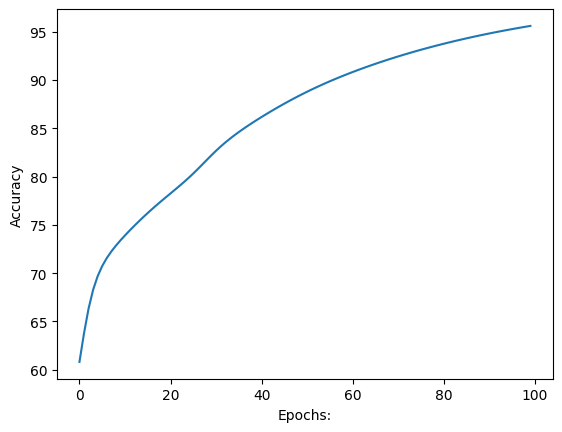

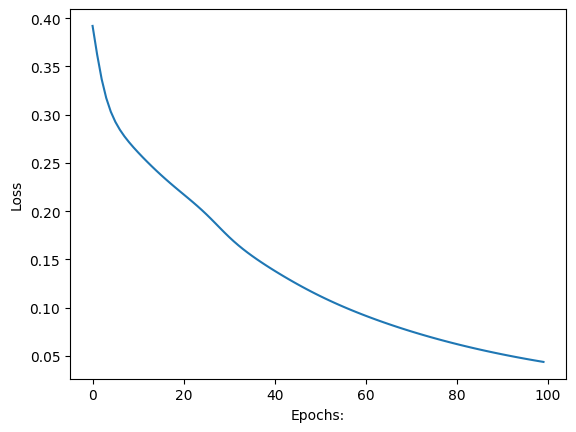

In [28]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [29]:
print(w1, "\n", w2)

[[-0.5785071  -0.19192817  0.24778008 -0.75424445 -0.58824609]
 [-0.33997634  1.06559074  1.551449    0.30231218  0.86791062]
 [-0.55999557  1.59765727 -0.93873809  0.49303868 -0.46299313]
 [ 1.76906284 -0.22733663  0.52390138  0.35242366 -0.74526525]
 [-0.61731071 -0.24857675  1.62145114 -0.54301304  2.02551926]
 [-0.30830482  0.87817226 -1.0471948   0.53372823 -0.36674599]
 [ 1.03095443  1.51702226  1.59400691 -0.40794991  0.8470127 ]
 [-0.28880686  3.17604424 -0.39908662  0.78957088  2.28946226]
 [ 0.50178485 -0.4072402  -2.15674723  0.30005849 -1.68423131]
 [ 0.85040487 -1.18709647  0.35864012  0.24648263 -0.65030738]
 [-0.67441003 -0.31416748  0.79507583 -0.61867673 -0.31436528]
 [ 0.75333782  1.27996325  0.27722645  0.5977889   1.31569011]
 [ 1.23572736  0.13624158 -0.70584933 -0.28354315 -0.24196383]
 [-0.31782128  0.33300391  0.15608973  0.18144704  1.38748858]
 [-0.64022855 -0.19737801 -0.17339851 -1.98695491  0.98939014]
 [ 0.06905511 -0.21948187  0.10496196 -1.09018985  0.40

Image is of letter B.


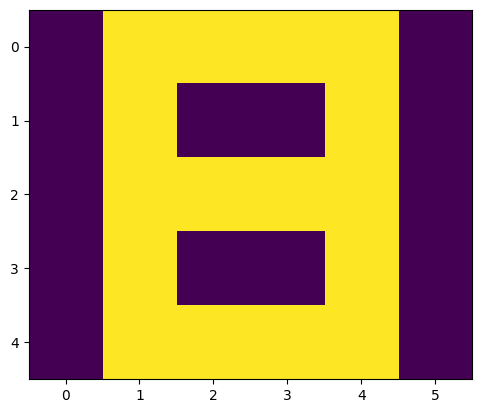

In [30]:
predict(x[1], w1, w2)